In [1]:
from numpy import array
import inspect
import subprocess
import shlex
import numpy as np
import scipy.cluster.vq as vq1
from scipy.cluster.vq import vq, kmeans, whiten, kmedians
import matplotlib.pyplot as plt
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"] 

In [2]:
dat2 = np.loadtxt('/Users/Winston/Dropbox/Equipartition/cart-1.2.2/xy512512exp.dat')
dat3 = np.loadtxt('/Users/Winston/Dropbox/Equipartition/cart-1.2.2/xy512512gaussian.dat')

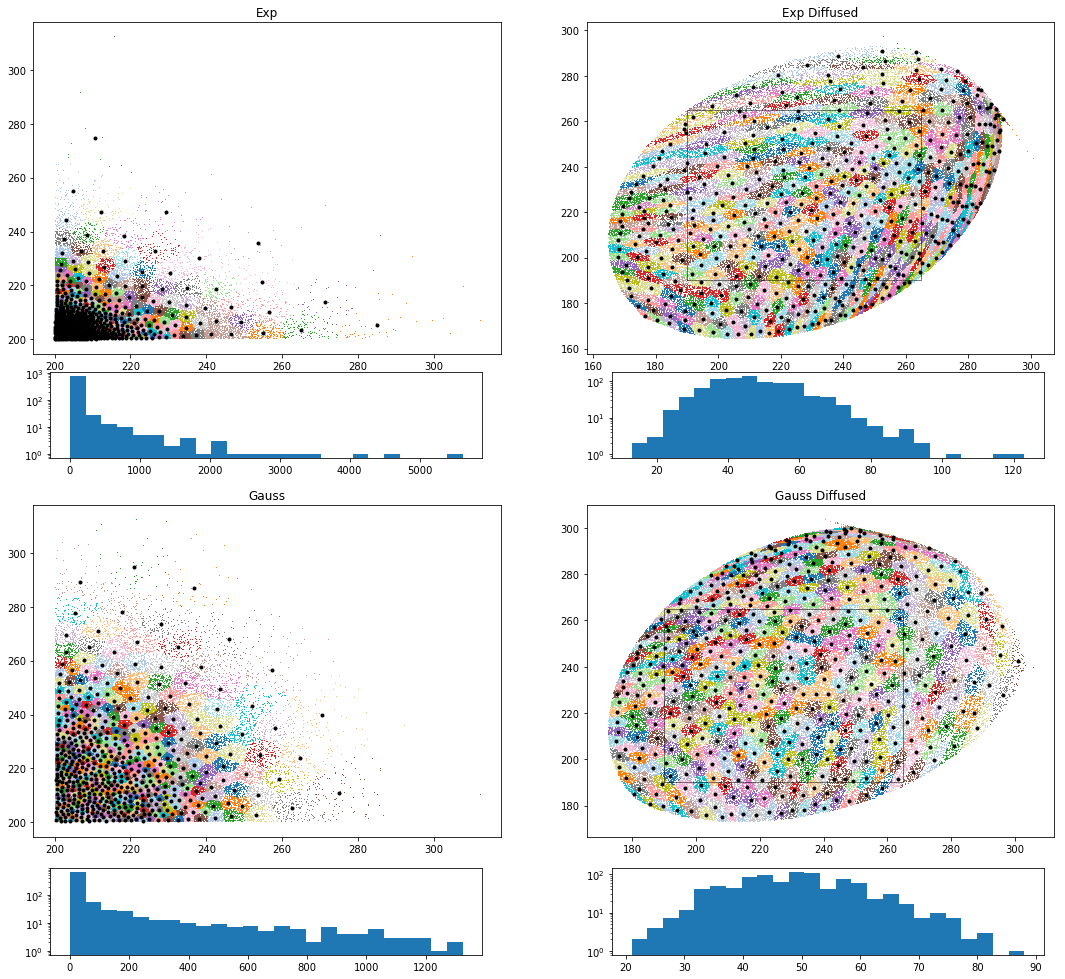

In [49]:
PATH = '/Users/Winston/Dropbox/Equipartition/cart-1.2.2/'
PATH1 = '/Dropbox/Equipartition/cart-1.2.2/'
p=subprocess.Popen(['./exp_cart.sh'], cwd =PATH) # makes expout.dat
p.wait()
p=subprocess.Popen(['./gauss_cart.sh'], cwd =PATH)
p.wait()
N=500
f, axs = plt.subplots(2, 2,figsize=(15,12))

plt.tight_layout(pad=1.4, w_pad=5.5, h_pad=13.0)
axs = axs.ravel()
data_list = [dat2,dat3]
titles = ["Exp","Exp Diffused",'Gauss',"Gauss Diffused"]
types = ['exp','gauss']

dat = np.zeros([1,2])
dat4 = np.zeros([1,2])

for k,j in enumerate([0,2]):
    
    features = data_list[k]
    codebook, distortion = kmedians(features,N)
    code, dist= vq(features,codebook)
    
    for i in range(N):
        
        # MAKE SHELL SCRIPT 
        file = open(PATH+"interp"+types[k]+str(i)+".sh","w") 
        file.write("#!/bin/sh\n") 
        file.write("cat "+PATH+types[k]+str(i)+".dat | ./interp 512 512 "\
                   +types[k]+"out.dat > "+PATH+types[k]+"out"+str(i)+".dat\n")
        file.write("cat "+PATH+"dif"+types[k]+str(i)+".dat | ./interp 512 512 "\
                   +types[k]+"out.dat > "+PATH+"dif"+types[k]+"out"+str(i)+".dat\n")
        file.close() 
                    
        # MAKE EXECUTABLE
        p=subprocess.call(['chmod','a+x',PATH+"interp"+types[k]+str(i)+".sh"])
        # save data to go to interp
        x = features[code==i,0]
        y = features[code==i,1]
        
        
        np.savetxt(PATH+types[k]+str(i)+'.dat',np.column_stack([x,y]),fmt ='%.18f',delimiter=' ')
        np.savetxt(PATH+"dif"+types[k]+str(i)+'.dat',np.column_stack([codebook[:,0],codebook[:,1]]),fmt ='%.18f',delimiter=' ')
        # plot
        axs[j].plot(x,y,',', c=colors[i%len(colors)])
        
        # call interp
        #print(PATH+"interp"+types[k]+str(i)+".sh")
        p = subprocess.Popen(['./'+"interp"+types[k]+str(i)+".sh"], cwd =PATH) # makes expout.dat
        
        p.wait()
        
        # saves data to run through interp shell script
        data=np.loadtxt(PATH+types[k]+'out'+str(i)+'.dat') #Gaussout0.dat
        
        axs[j+1].plot(data[:,0],data[:,1],',', c=colors[i%len(colors)])
        if types[k]=="exp":
            dat = np.append(dat,data,axis=0)
        elif types[k]=="gauss":
            dat4 = np.append(dat4,data,axis=0)
            
    axs[j].plot(codebook[:,0],codebook[:,1],'ko',ms=3)
    
    dif_medians = np.loadtxt(PATH+'dif'+types[k]+'out'+str(i)+'.dat')
    axs[j+1].plot(dif_medians[:,0],dif_medians[:,1],'ko',ms=3)
        
for j in range(4):    
    axs[j].set_title(titles[j])

bin_min = 190
bin_max = 265

axs[1].plot([bin_min, bin_min,bin_max,bin_max,bin_min], [bin_min,bin_max,bin_max,bin_min,bin_min], 'k-',lw=.5) 
axs[3].plot([bin_min, bin_min,bin_max,bin_max,bin_min], [bin_min,bin_max,bin_max,bin_min,bin_min], 'k-',lw=.5) 
    
    
# Histograms
binsize = 30
bigbin = 20

# exp raw
Hexdat,xedge,yedge=np.histogram2d(dat2[:,0],dat2[:,1],bins=[binsize,binsize],range=[[200, 270], [200, 270]]) 

H,xedge,yedge=np.histogram2d(dat[:,0],dat[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]]) #BINS = SIZE/2*PIXELGAP

# Gauss Raw
H2,xedge,yedge=np.histogram2d(dat3[:,0],dat3[:,1],bins=[binsize,binsize],range=[[200, 300], [200, 300]]) #BINS = SIZE/2*PIXELGAP

H3,xedge,yedge=np.histogram2d(dat4[:,0],dat4[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]]) #BINS = SIZE/2*PIXELGAP

    
    
    
    
    

plt.axes([0.05, 0.475, .4, .1] )
plt.hist(Hexdat.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')
plt.axes([0.57, 0.475, .4, .1] )
plt.hist(H.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')


plt.axes([0.05, -0.1, .4, .1] )
plt.hist(H2.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')
plt.axes([0.57, -0.1, .4, .1] )
plt.hist(H3.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')

plt.show()

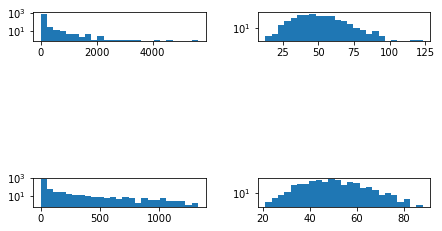

In [47]:
plt.axes([0.05, 0.475, .4, .1] )
plt.hist(Hexdat.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')
plt.axes([0.57, 0.475, .4, .1] )
plt.hist(H.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')

plt.axes([0.05, -0.1, .4, .1] )
plt.hist(H2.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')
plt.axes([0.57, -0.1, .4, .1] )
plt.hist(H3.flatten(),bins = 25,histtype = "bar")
plt.yscale('log', nonposy='clip')

plt.show()